<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [67]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [68]:
df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [14]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
disgust    1066
Name: emosi, dtype: int64

In [69]:
df1 = pd.read_csv(url0)

In [70]:
df1=df1.drop(df1[df1['emosi'] == 'joy'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'sadness'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'anger'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'fear'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'disgust'].sample(frac=1).index)

In [71]:
df2=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus2.txt', delimiter = ";")
df2.columns=['dok','tes']

In [72]:
df3=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus3.csv')

In [73]:
df4=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus4.tsv', delimiter = "	")
df4.columns=['dok','num','code']

In [74]:
df5=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/twitter_prosessed2.csv')

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
dftwit = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
# df3.columns = ["arti"]

persiapan corpus tambahan

In [76]:
final=[]

In [77]:
final.extend(df1.dokumen)

In [78]:
final.extend(df2.dok)

In [79]:
final.extend(df3.content)

In [80]:
final.extend(df4.dok)

In [81]:
final.extend(df5.content)

In [82]:
final.extend(dftwit.tweet)

In [83]:
dfg = pd.DataFrame(final)
dfg.columns=["dok"]

preputama : lower case

In [84]:
def lower(temp):
  return temp.str.lower()

In [85]:
df['dokumen']=lower(df['dokumen'])

In [86]:
dfg['dok']=lower(dfg['dok'])

preputama : Pembersihan noise (over enter and space)

In [33]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [87]:
df=bersih_noise(df)

In [88]:
dfg=bersih_noise(dfg)

preptambah : expand contractions

In [36]:
!pip install contractions
import contractions
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

     |████████████████████████████████| 321 kB 7.0 MB/s 
     |████████████████████████████████| 284 kB 47.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85456 sha256=e76cc666bb9cd8f8758959e546b73854690ca5bcbfacce880f1fc87b801a284b
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [89]:
df.dokumen=expand_word(df.dokumen)

In [90]:
dfg.dok=expand_word(dfg.dok)

preputama : cleansing punctuation

In [39]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [91]:
df['dokumen'] = clns_punc(df['dokumen'])

In [92]:
dfg['dok'] = clns_punc(dfg['dok'])

preputama : cleansing number

In [42]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [93]:
df.dokumen=clns_numb(df.dokumen)

In [94]:
dfg.dok=clns_numb(dfg.dok)

preptambah : remove stopword

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [95]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [96]:
dfg['dok'] = remove_stopw(dfg['dok'])

tokenizing

In [48]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [97]:
df.dokumen=token(df.dokumen)

In [98]:
dfg.dok=token(dfg.dok)

preptambah : Lemmatization

In [51]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [99]:
lemma(df['dokumen'])

In [100]:
lemma(dfg['dok'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [101]:
# sent=df.dokumen

In [102]:
sent=dfg.dok.append(df.dokumen,ignore_index=True)

word2ec

In [55]:
from gensim.models import Word2Vec

In [103]:
w2v = Word2Vec(sent, window=5, min_count=1, workers=12, sg=1, iter=1)

In [ ]:
# (sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, 
#  seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, 
#  null_word=0, trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(), max_final_vocab=None)

cek model

In [104]:
w2v.wv.vectors.shape

(436866, 100)

In [105]:
w2v.wv["moment"]

array([ 0.46616104, -0.6667097 ,  0.21175699, -0.17003034,  0.22777887,
       -0.6260089 , -0.689129  , -0.03986612, -0.86807305,  0.22812265,
        0.5345102 , -0.81842   ,  0.01311234, -0.62944347,  0.27166596,
       -0.34221283, -0.40289676, -0.17900814,  0.4278269 ,  1.0497411 ,
       -0.32527405,  0.33115852, -0.09799121, -0.04311029,  0.4741494 ,
       -0.0156508 ,  0.1113618 ,  0.09682317, -0.39474306,  0.6521995 ,
        0.11885468, -0.2012365 , -0.118765  ,  0.40433794,  0.11527864,
        0.7130748 ,  0.03936816, -0.56632924, -0.06052878,  0.2560363 ,
       -0.11648832, -0.37020373,  0.12979403, -0.35096988,  0.24544276,
        0.74622935, -0.02807938, -0.33408308,  0.8813753 ,  0.18545051,
       -0.17151235, -0.34817964, -0.32790738,  0.4593114 ,  0.29152402,
       -0.1631512 , -0.6040571 ,  0.7455042 ,  0.15359913,  0.42284808,
       -0.22726578, -0.50607884,  0.12696084,  0.18170413, -0.1193886 ,
       -0.9948384 ,  0.5857671 ,  0.7968629 ,  0.93173087,  0.43

ekstraksi fitur

In [106]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,w2v.wv[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [107]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(5395, 100)
(5395,)


klasifikasi svm

In [61]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [243]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [63]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

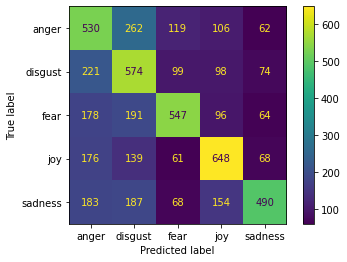

0.5169601482854495
(0.5364099408091609, 0.5168586120534628, 0.5202082160989143, None)


In [108]:
klasifikasi('poly')

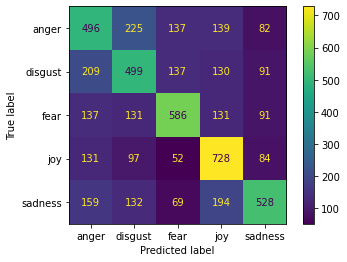

0.5258572752548656
(0.5298529606852165, 0.5254103007498733, 0.5250175483788263, None)


In [109]:
klasifikasi('rbf')

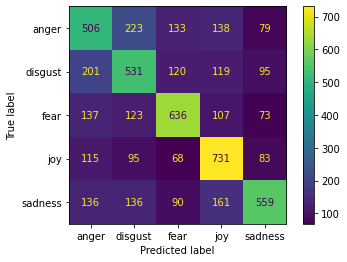

0.5492122335495829
(0.5519189920975084, 0.5488408814505842, 0.548607264609102, None)


In [110]:
klasifikasi('linear')